<a href="https://colab.research.google.com/github/WPela/DataScience_2023/blob/main/Time_series/Time_series_GARCH_and_VaR_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GARCH modelling and forecasting

*Arch library is not preinstalled in Google Colab service*

In [ ]:
pip install arch

*Intitial setting for graphs*

In [205]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [206]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context="notebook", style="whitegrid",
              palette="colorblind", color_codes=True,
              rc={"figure.figsize": [12, 8]})

In [207]:
import yfinance as yf
import pandas as pd
import numpy as np
from arch import arch_model
from datetime import datetime
from statsmodels.stats.diagnostic import het_arch

### Texas Instruments stocks were selected for the analysis

In [208]:
RISKY_ASSET = "TXN"  ##Texas Instruments
START_DATE = "2016-01-01"
END_DATE = "2022-12-31"

In [209]:
df = yf.download(RISKY_ASSET,
                 start=START_DATE,
                 end=END_DATE)

[*********************100%***********************]  1 of 1 completed


In [210]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,53.549999,54.340000,53.369999,54.340000,44.504356,7915400
2016-01-05,54.270000,54.470001,53.549999,53.770000,44.037533,6131900
2016-01-06,52.950001,53.889999,52.720001,53.419998,43.750874,8520800
2016-01-07,52.389999,52.950001,51.369999,51.700001,42.342201,10526700
2016-01-08,51.520000,51.980000,50.240002,50.360001,41.244743,9620000


*Daily returns*

Average return: 0.09%


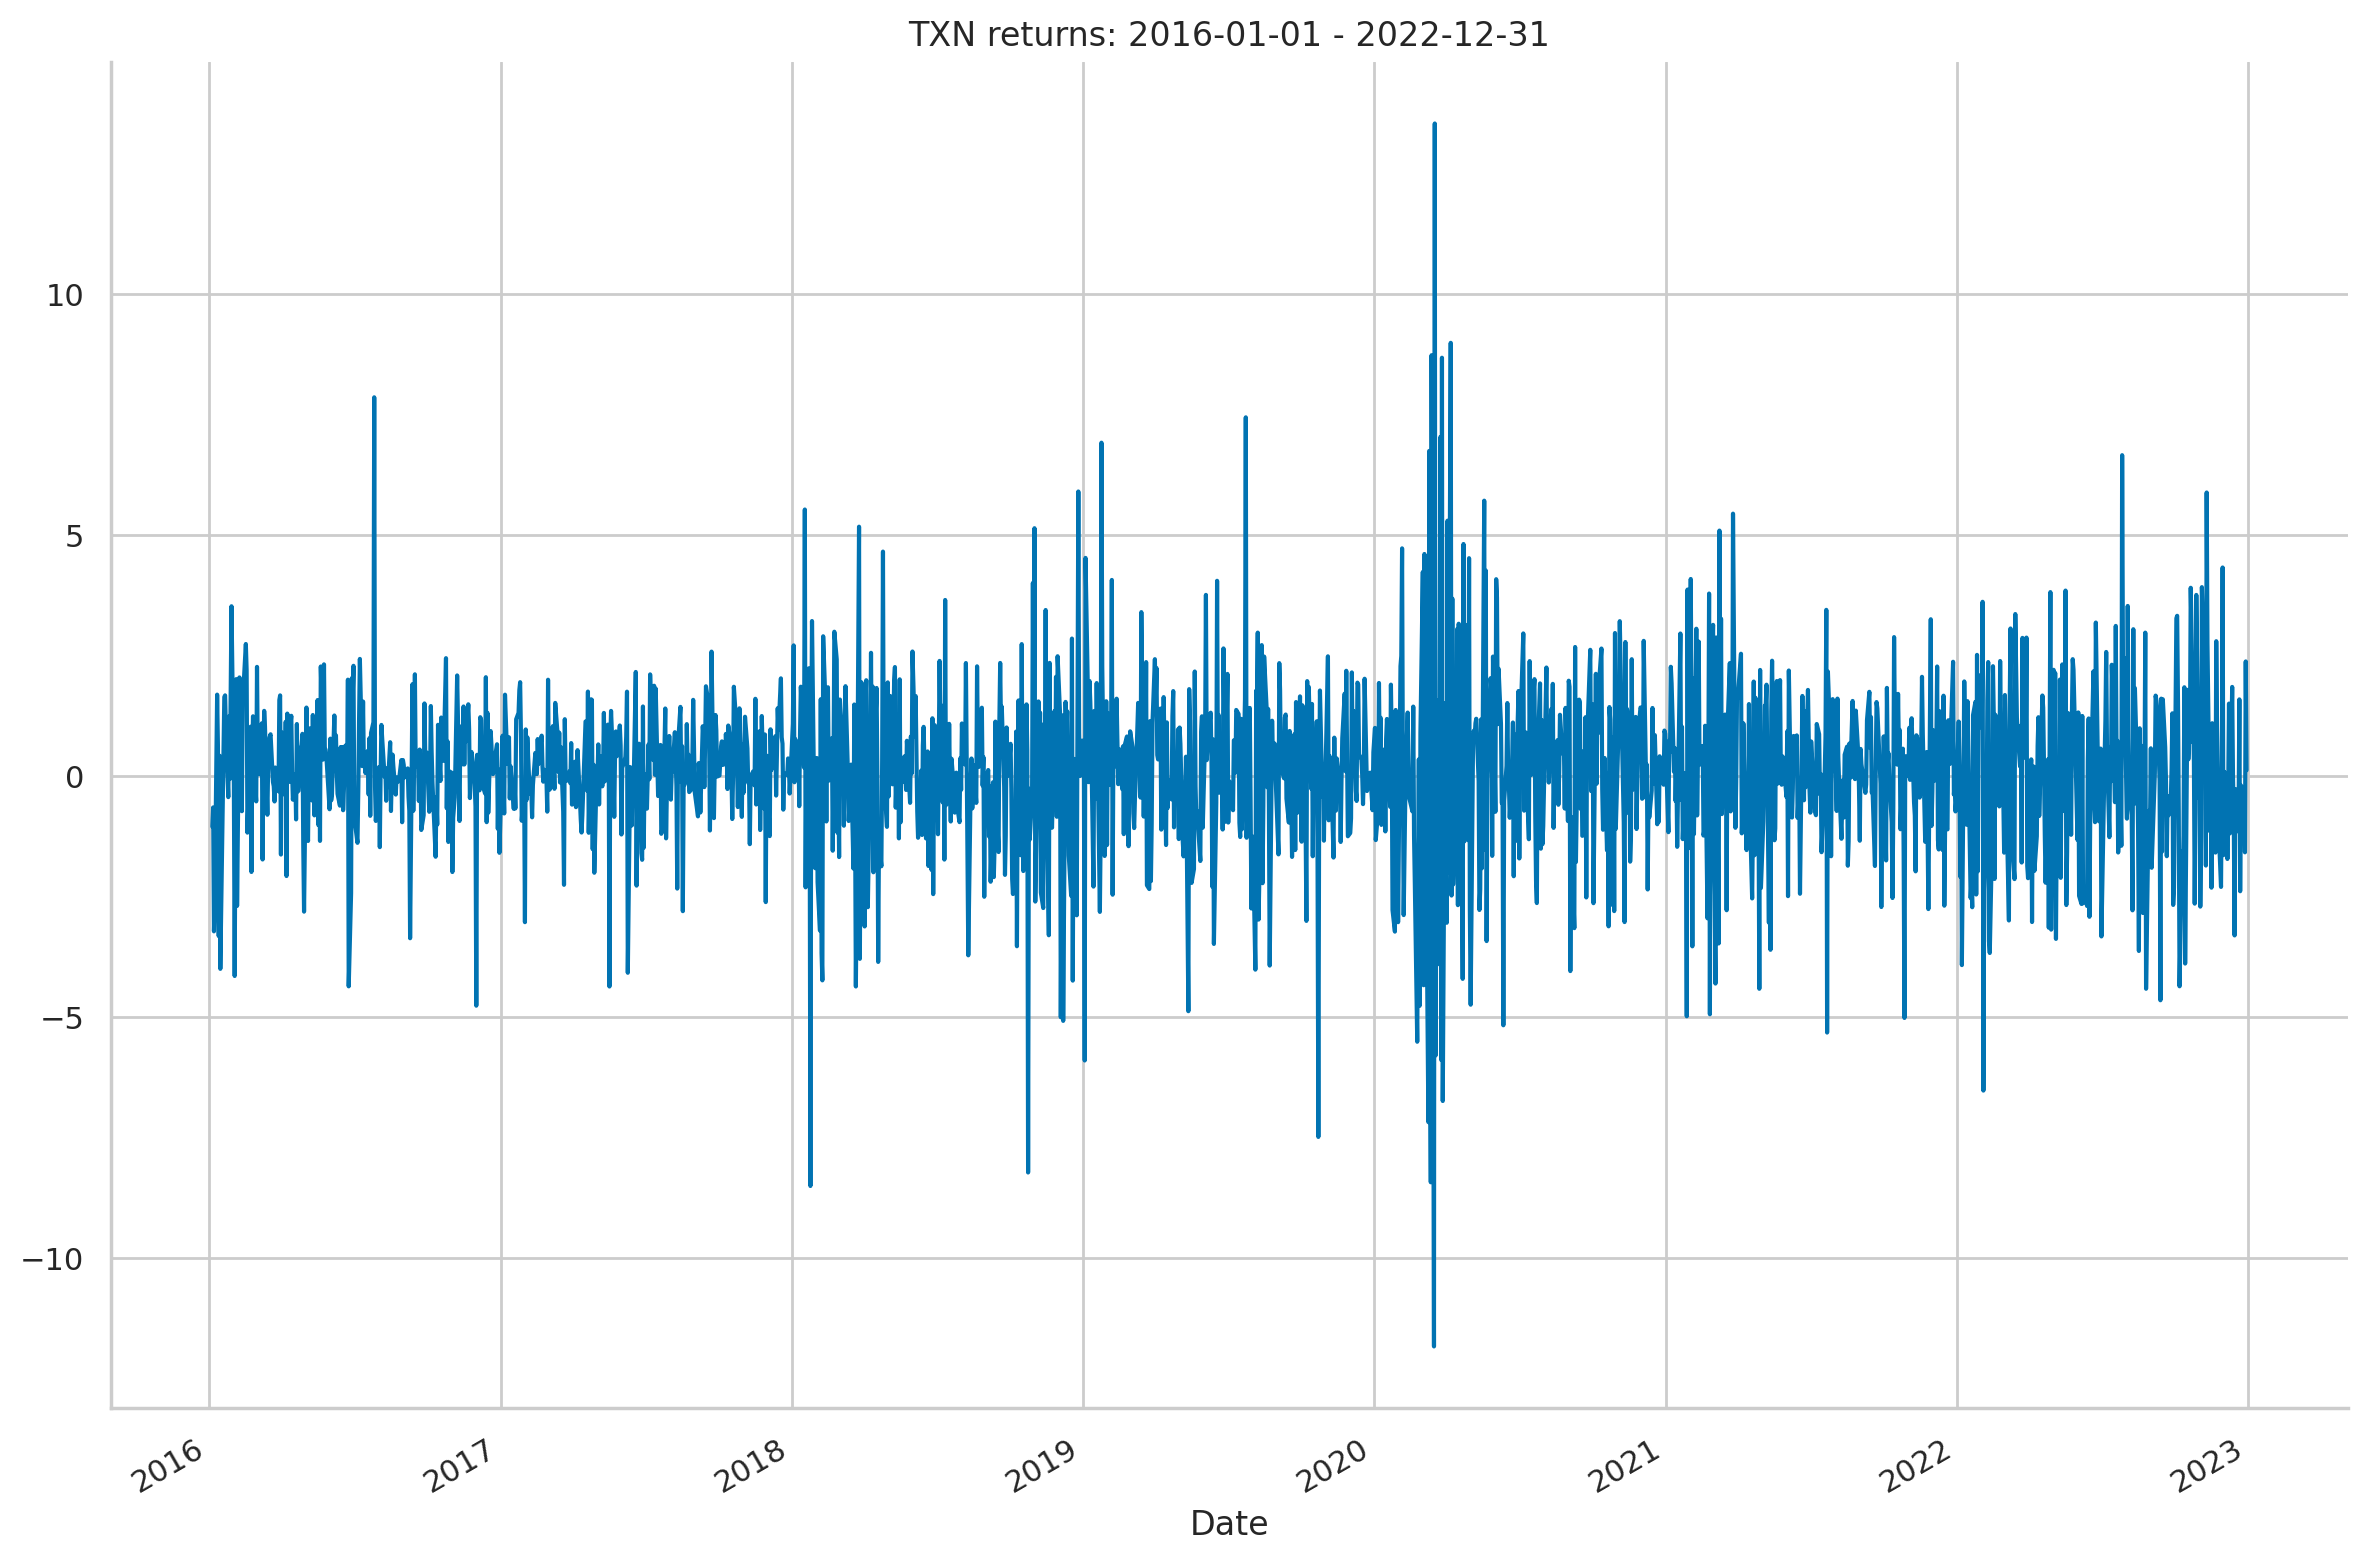

In [211]:
returns = 100 * df["Adj Close"].pct_change().dropna()
returns.name = "asset_returns"
print(f"Average return: {round(returns.mean(), 2)}%")
returns.plot(title=f"{RISKY_ASSET} returns: {START_DATE} - {END_DATE}");

sns.despine()
plt.tight_layout()

*GARCH(1,1) model initialized*

In [212]:
model = arch_model(returns, mean="Zero", vol="GARCH", p=1, q=1)

In [213]:
fitted_model = model.fit(disp="off")
print(fitted_model.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -3380.92
Distribution:                  Normal   AIC:                           6767.85
Method:            Maximum Likelihood   BIC:                           6784.27
                                        No. Observations:                 1761
Date:                Sat, Jul 15 2023   Df Residuals:                     1761
Time:                        14:40:02   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.1140  4.298e-02      2.652  7.996e-03 [2.976e-0

*   *In all cases P value is smaller than 0.05*
*   *In all cases Coeficiency is positive*




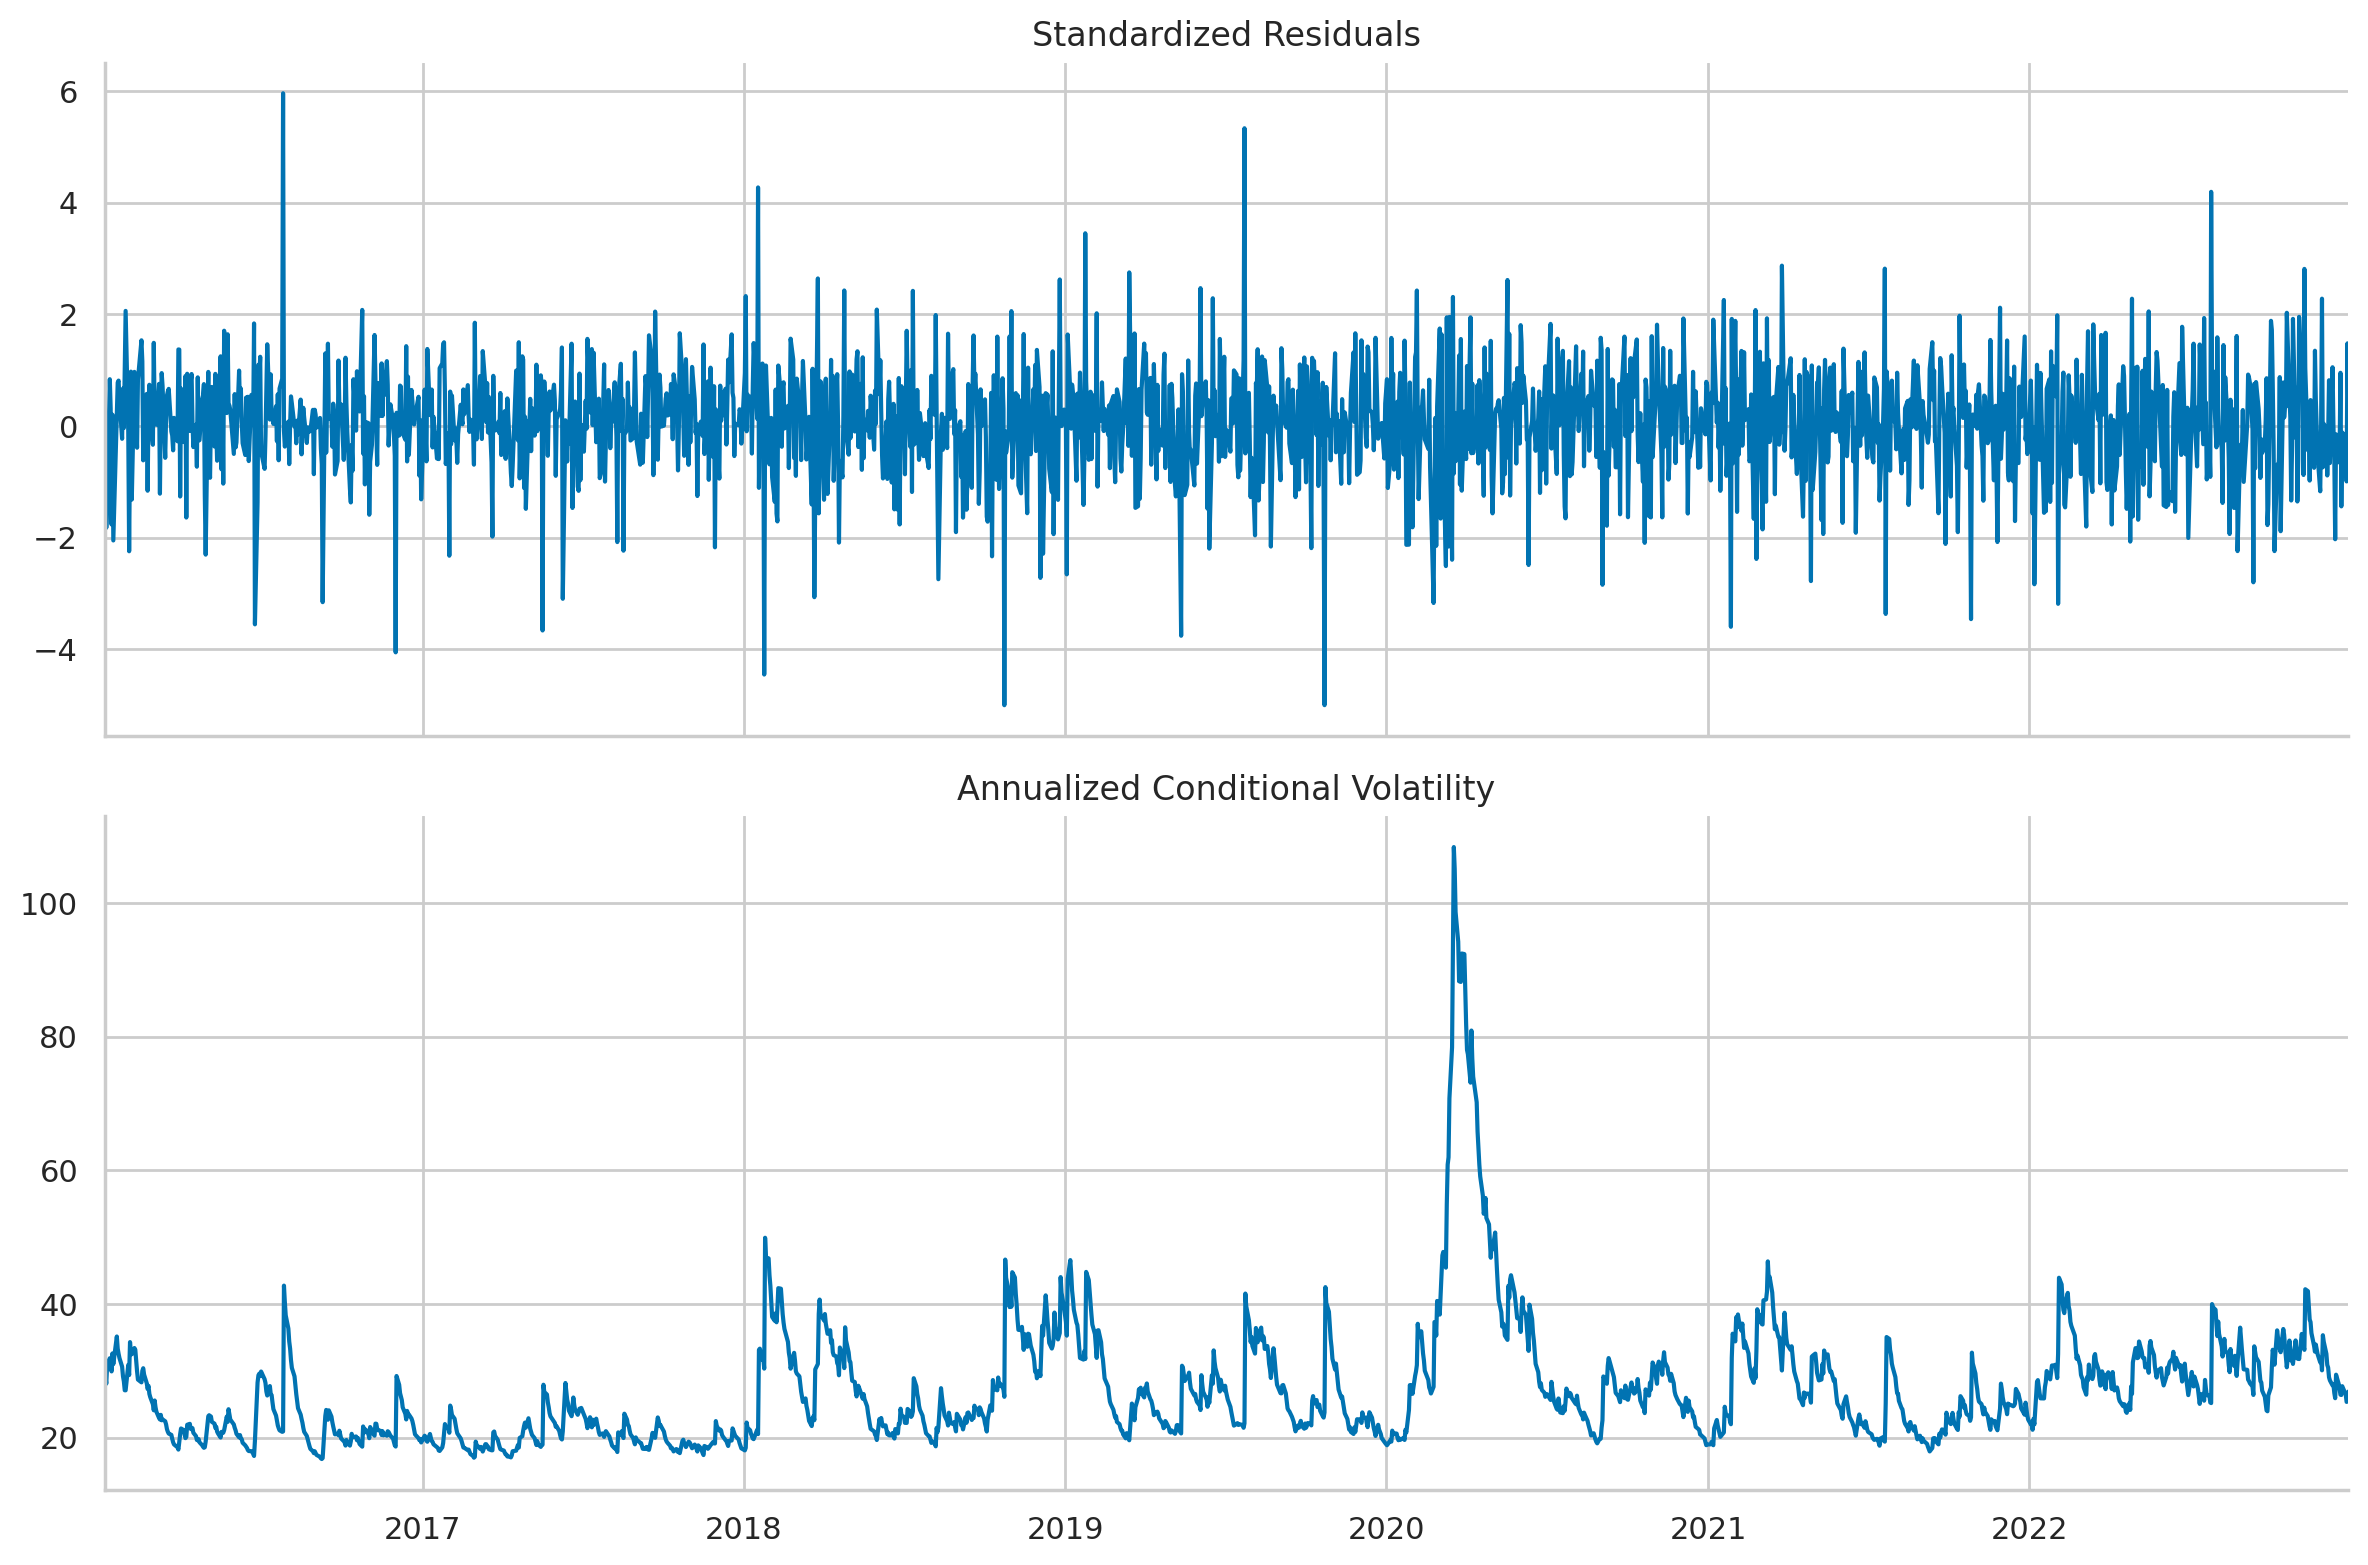

In [214]:
fitted_model.plot(annualize="D")

sns.despine()
plt.tight_layout()

In [215]:
SPLIT_DATE = datetime(2022, 1, 1)
fitted_model = model.fit(last_obs=SPLIT_DATE, disp="off")

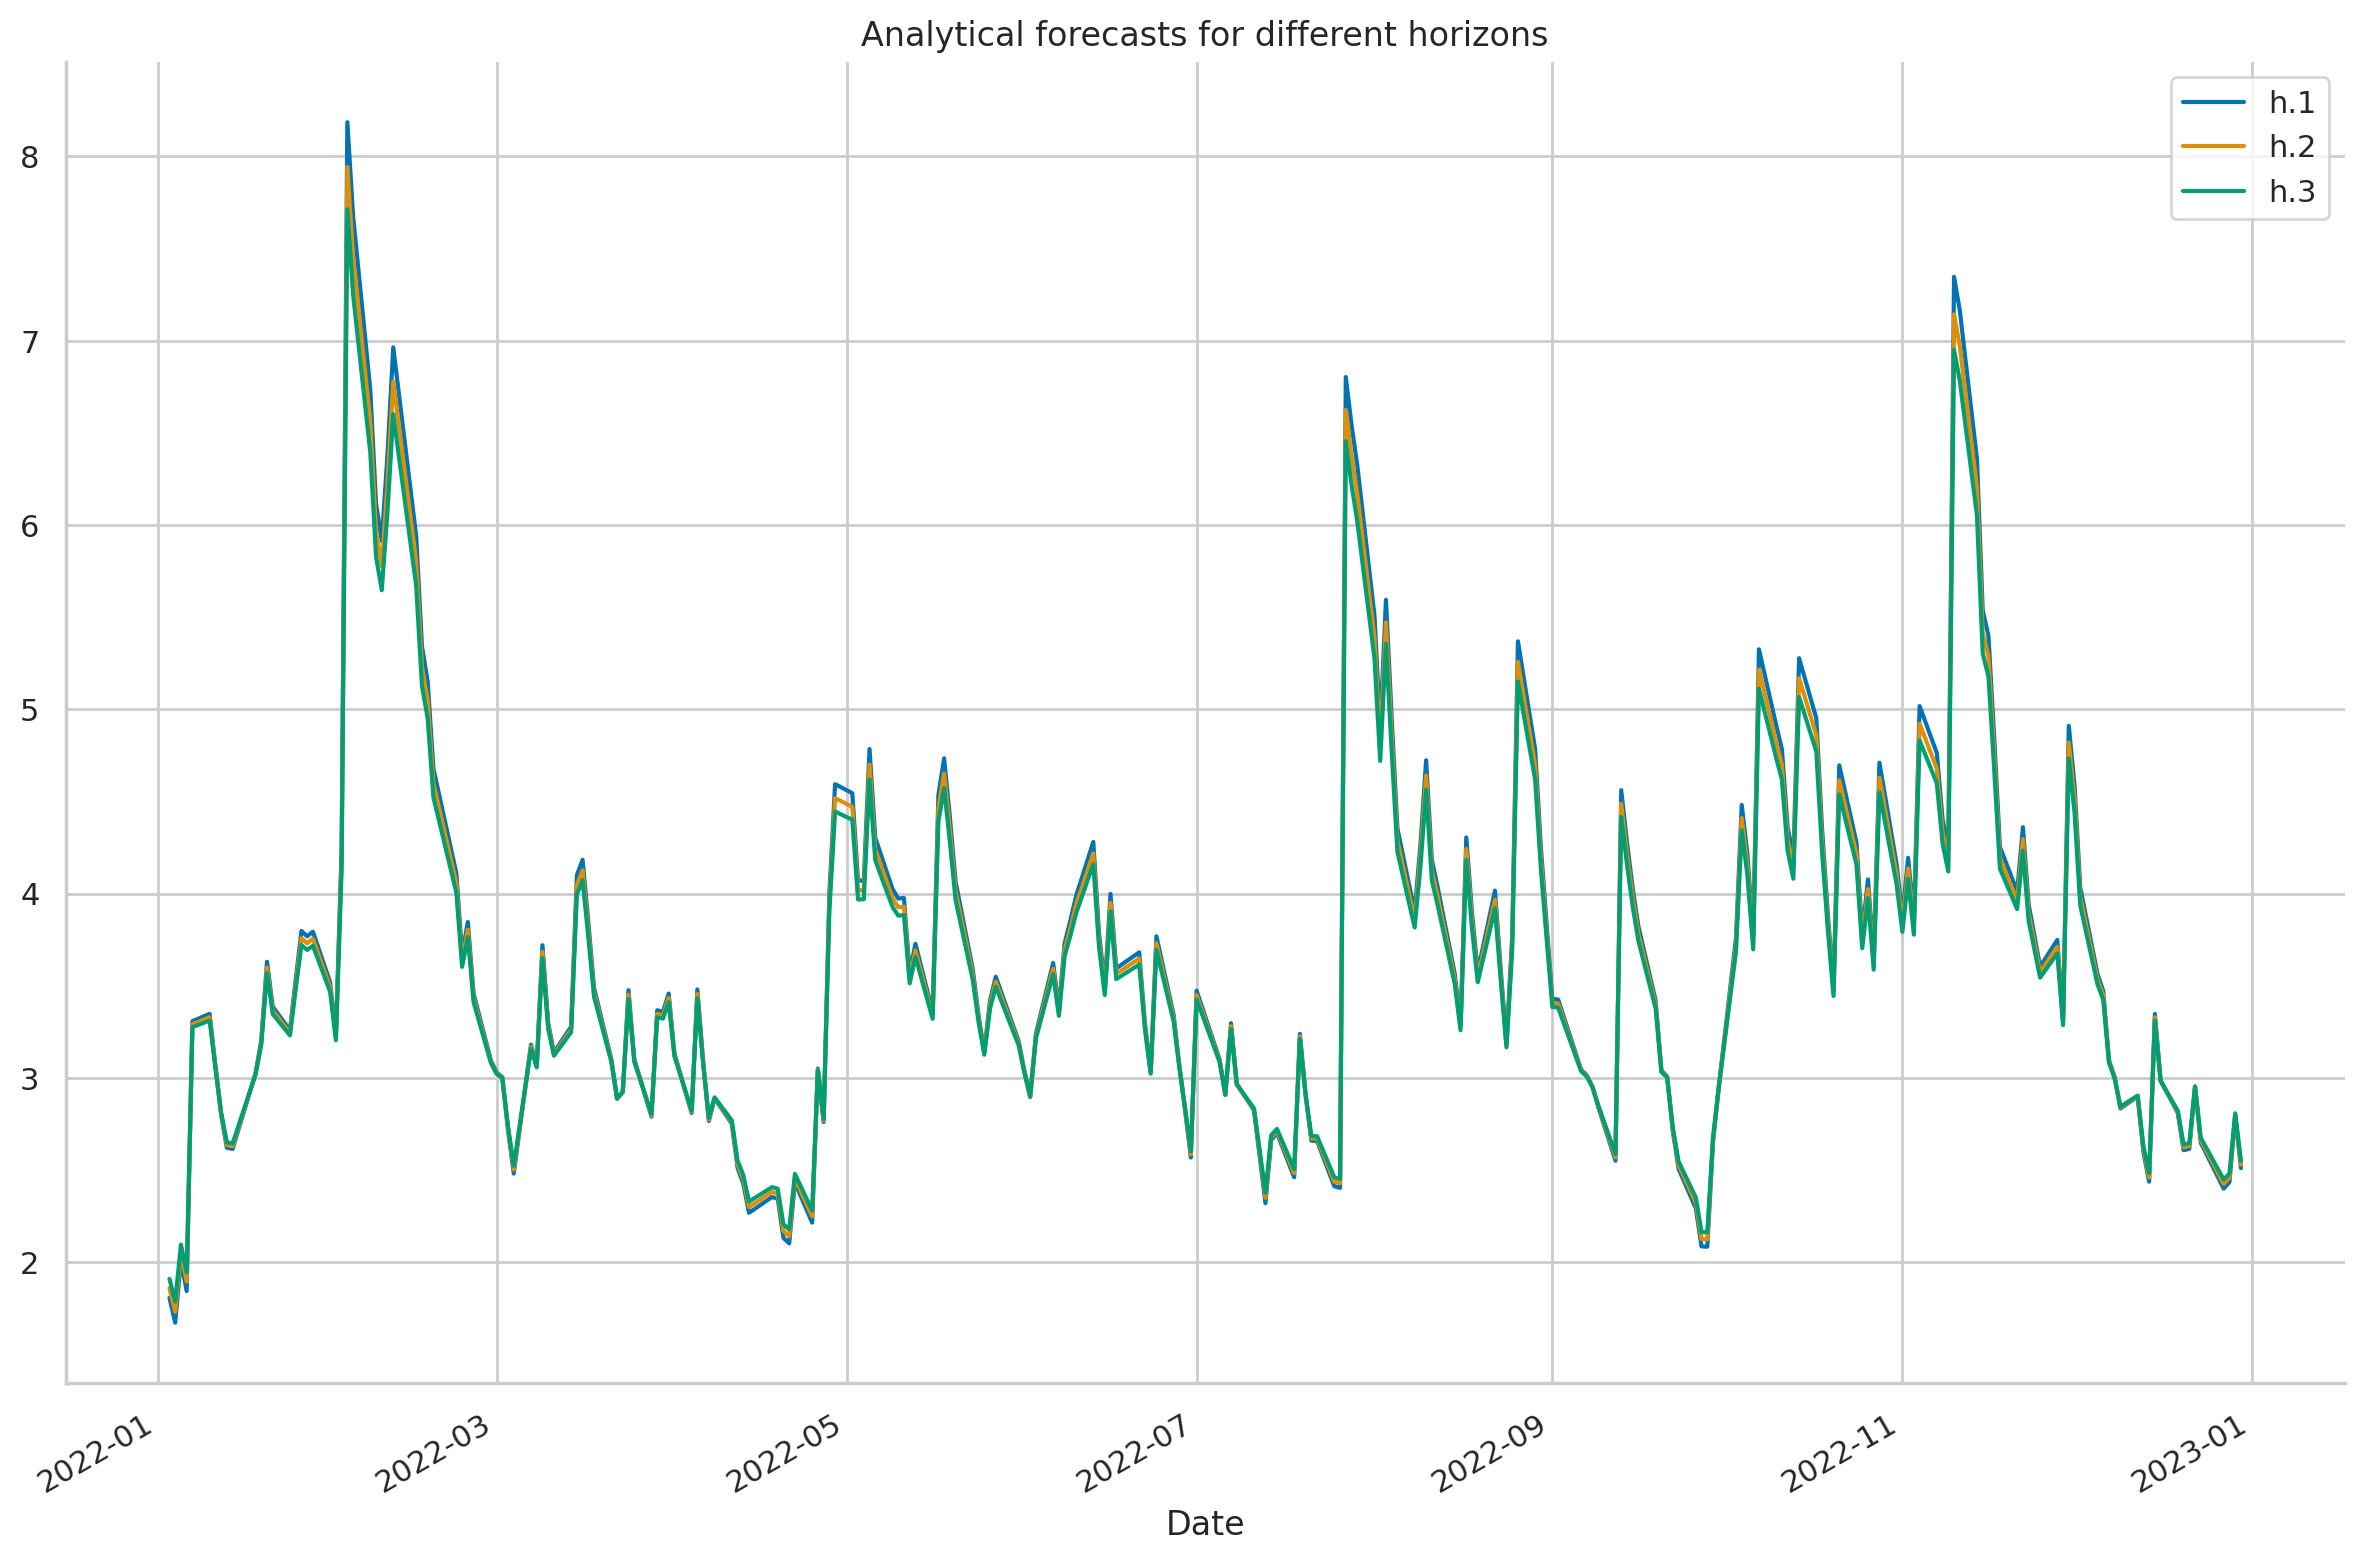

In [216]:
forecasts_analytical = fitted_model.forecast(horizon=3,
                                             start=SPLIT_DATE,
                                             reindex=False)
forecasts_analytical.variance.plot(
    title="Analytical forecasts for different horizons"
)

sns.despine()
plt.tight_layout()

Used forecast functionality come from arch library and performs below formula

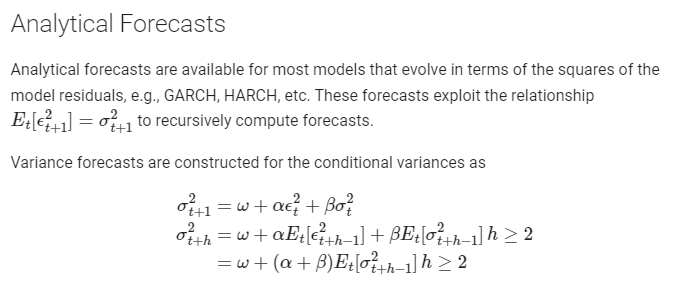

## Value at Risk - Monte Carlo method

In [217]:
np.random.seed(42)

VaR of two assets portfolio

In [218]:
RISKY_ASSETS = ["TXN", "CSCO"]
SHARES = [5, 5]
START_DATE = "2022-01-01"
END_DATE = "2022-12-31"
T = 1
N_SIMS = 10 ** 5

In [219]:
df = yf.download(RISKY_ASSETS,
                 start=START_DATE,
                 end=END_DATE)

[*********************100%***********************]  2 of 2 completed


In [220]:
df.head()

Adj Close                  Close                   High  \
                 CSCO         TXN       CSCO         TXN       CSCO   
Date                                                                  
2022-01-03  59.845665  182.641113  63.160000  190.600006  63.349998   
2022-01-04  58.377876  182.832733  61.250000  190.800003  62.810001   
2022-01-05  57.453362  179.018936  60.279999  186.820007  61.639999   
2022-01-06  58.063347  178.961441  60.919998  186.759995  61.130001   
2022-01-07  58.263504  171.947113  61.130001  179.440002  61.500000   

                              Low                   Open              \
                   TXN       CSCO         TXN       CSCO         TXN   
Date                                                                   
2022-01-03  190.619995  62.500000  187.460007  62.900002  188.820007   
2022-01-04  192.100006  61.110001  188.199997  62.439999  191.000000   
2022-01-05  191.610001  60.250000  186.649994  61.189999  190.410004   
2022-01-06  188.520004  59.910000  185.789993  60.000000  186.669998   
2022-01-07  184.059998  60.669998  178.899994  60.869999  181.970001   

              Volume           
                CSCO      TXN  
Date                           
2022-01-03  17184300  3781500  
2022-01-04  29682500  4137500  
2022-01-05  30317900  5047400  
2022-01-06  19616600  4502600  
2022-01-07  20152400  7414200

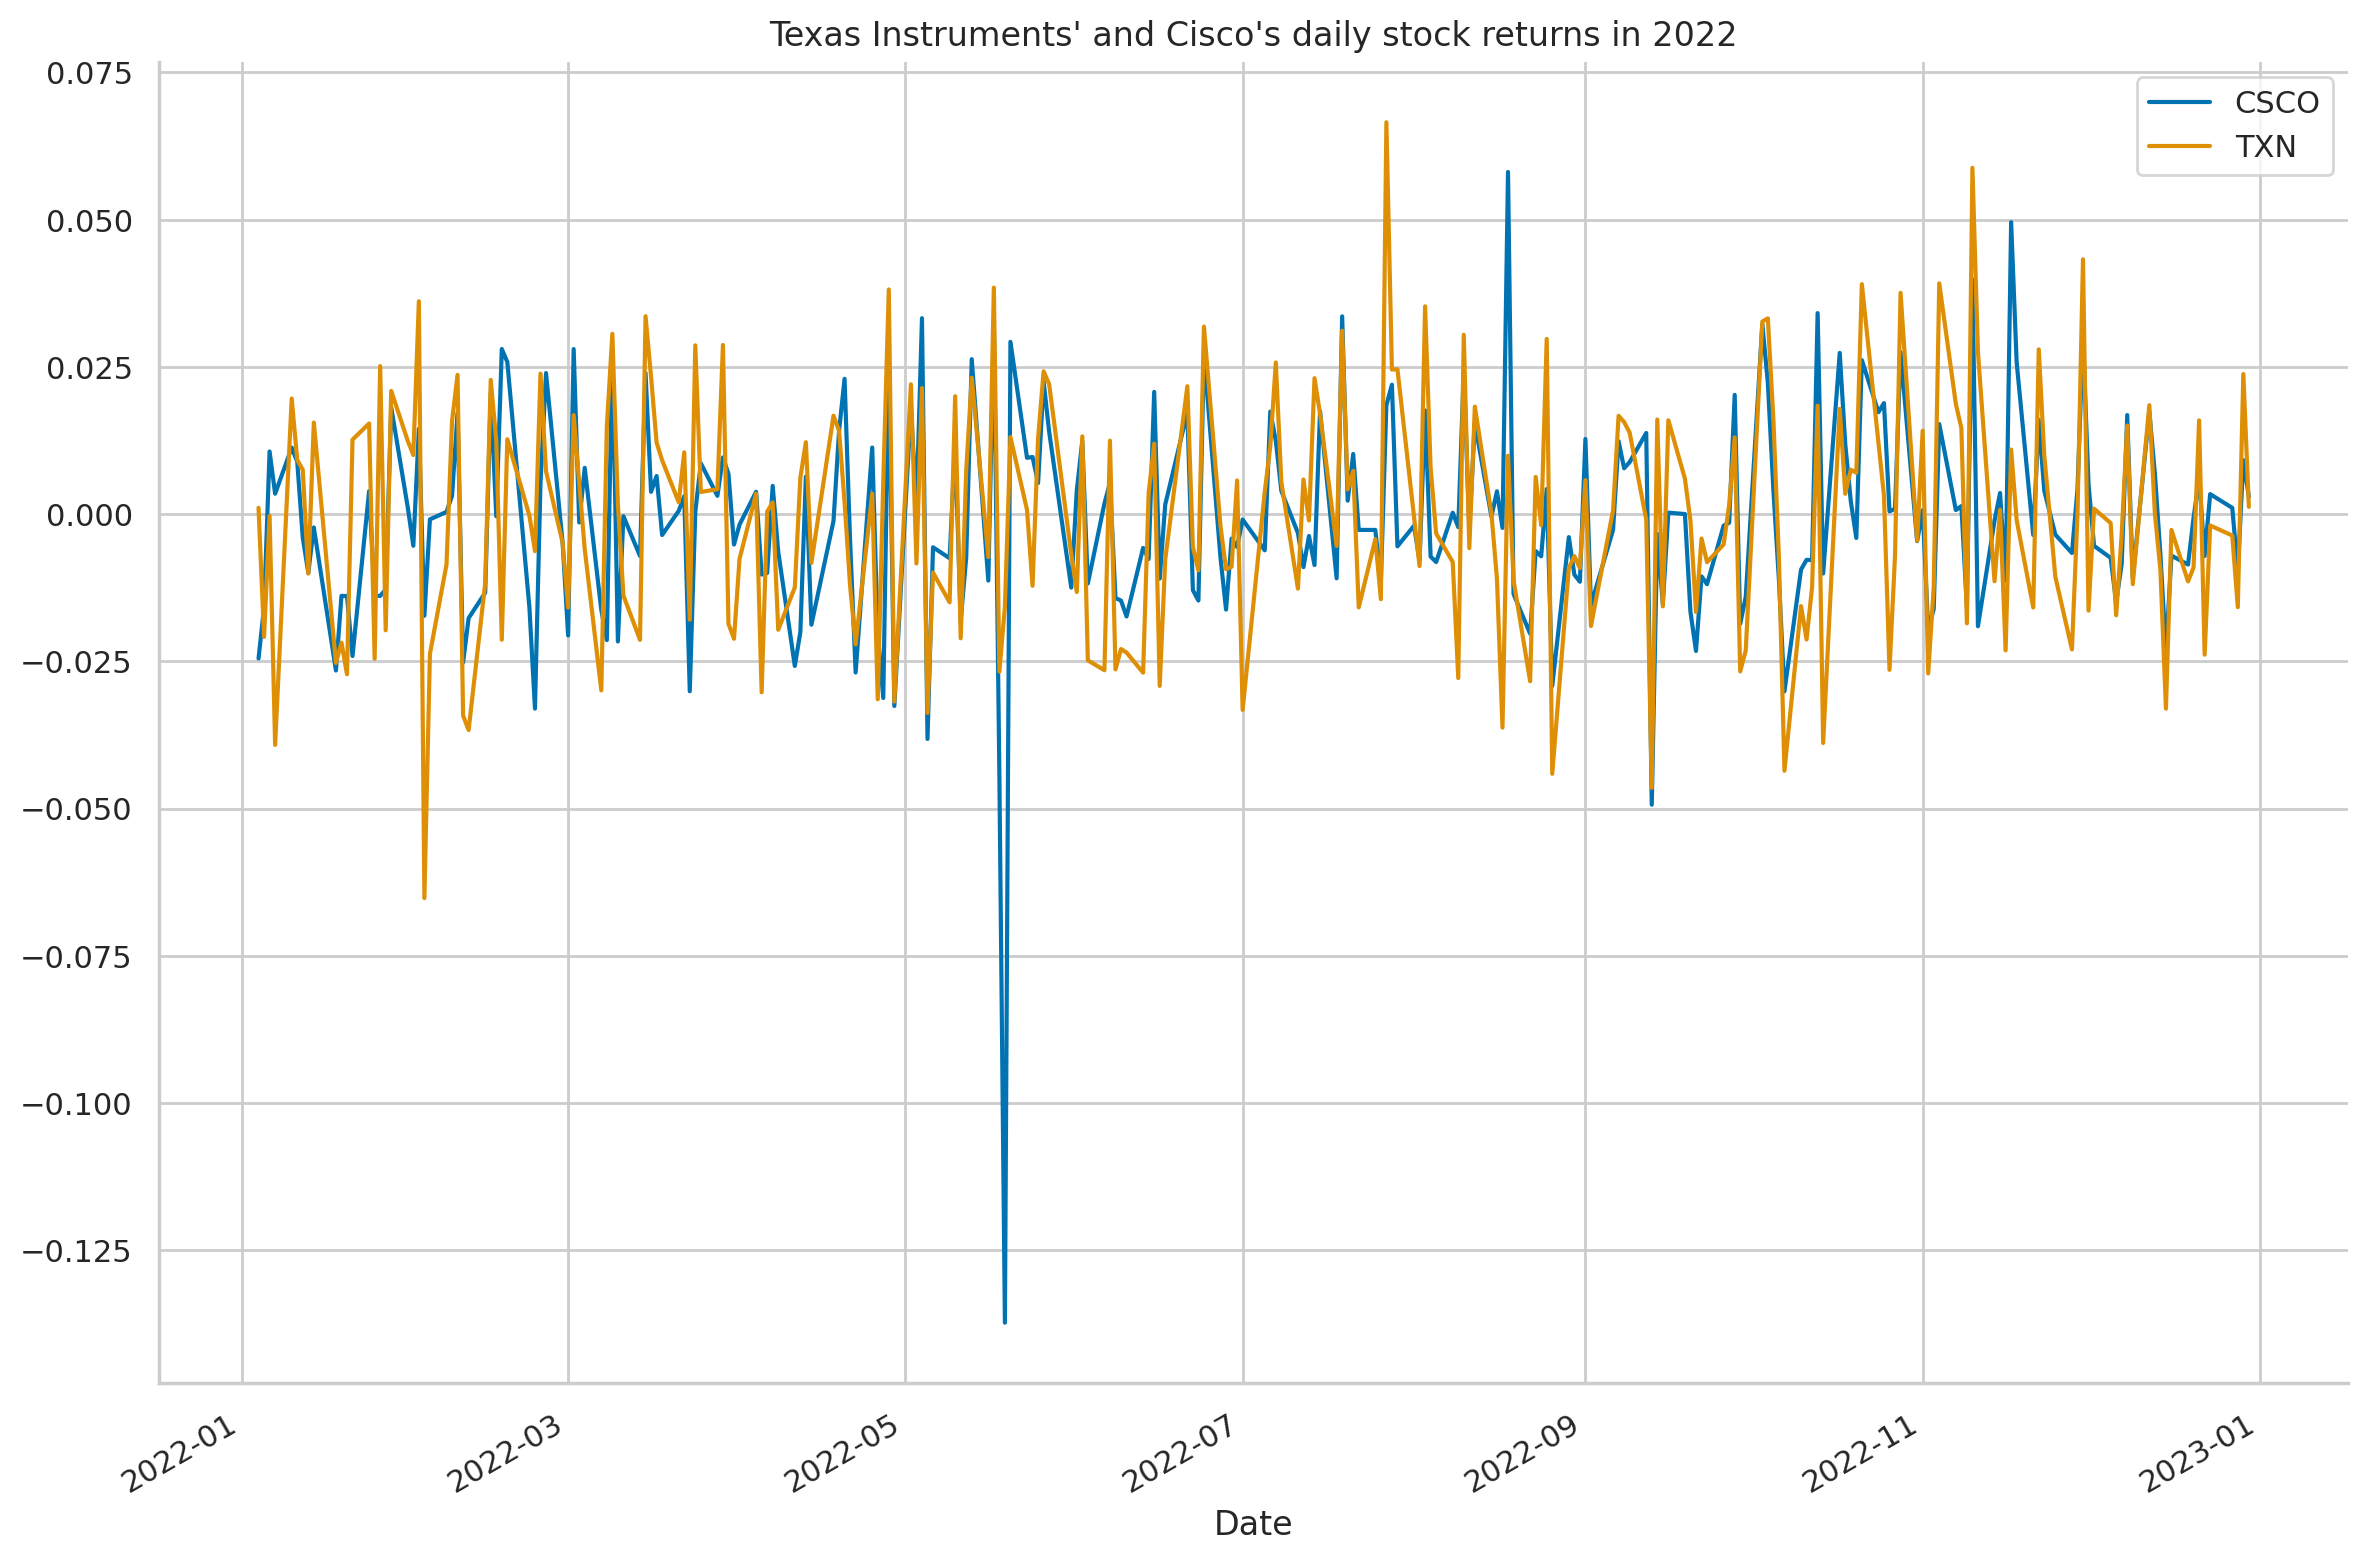

In [221]:
returns = df["Adj Close"].pct_change().dropna()
returns.plot(title="Texas Instruments' and Cisco's daily stock returns in 2022")

sns.despine()
plt.tight_layout()

In [222]:
print(f'Correlation between returns: {returns.corr().values[0,1]:.2f}')

Correlation between returns: 0.62


In [223]:
cov_mat = returns.cov()
cov_mat

,CSCO,TXN
CSCO,0.000342,0.000233
TXN,0.000233,0.000409


In [224]:
chol_mat = np.linalg.cholesky(cov_mat)
chol_mat

array([[0.01848405, 0.        ],
       [0.01257997, 0.01582535]])

In [225]:
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))

In [226]:
r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = df["Adj Close"].values[-1, :]
P_0 = np.sum(SHARES * S_0)

In [227]:
S_T = S_0 * np.exp(
    (r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * correlated_rv
)

In [228]:
P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

In [229]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)

for x, y in zip(percentiles, var):
    print(f"1-day VaR with {100-x}% confidence: {-y:.2f}$")

1-day VaR with 99.99% confidence: 2.01$
1-day VaR with 99.9% confidence: 1.79$
1-day VaR with 99.0% confidence: 1.51$


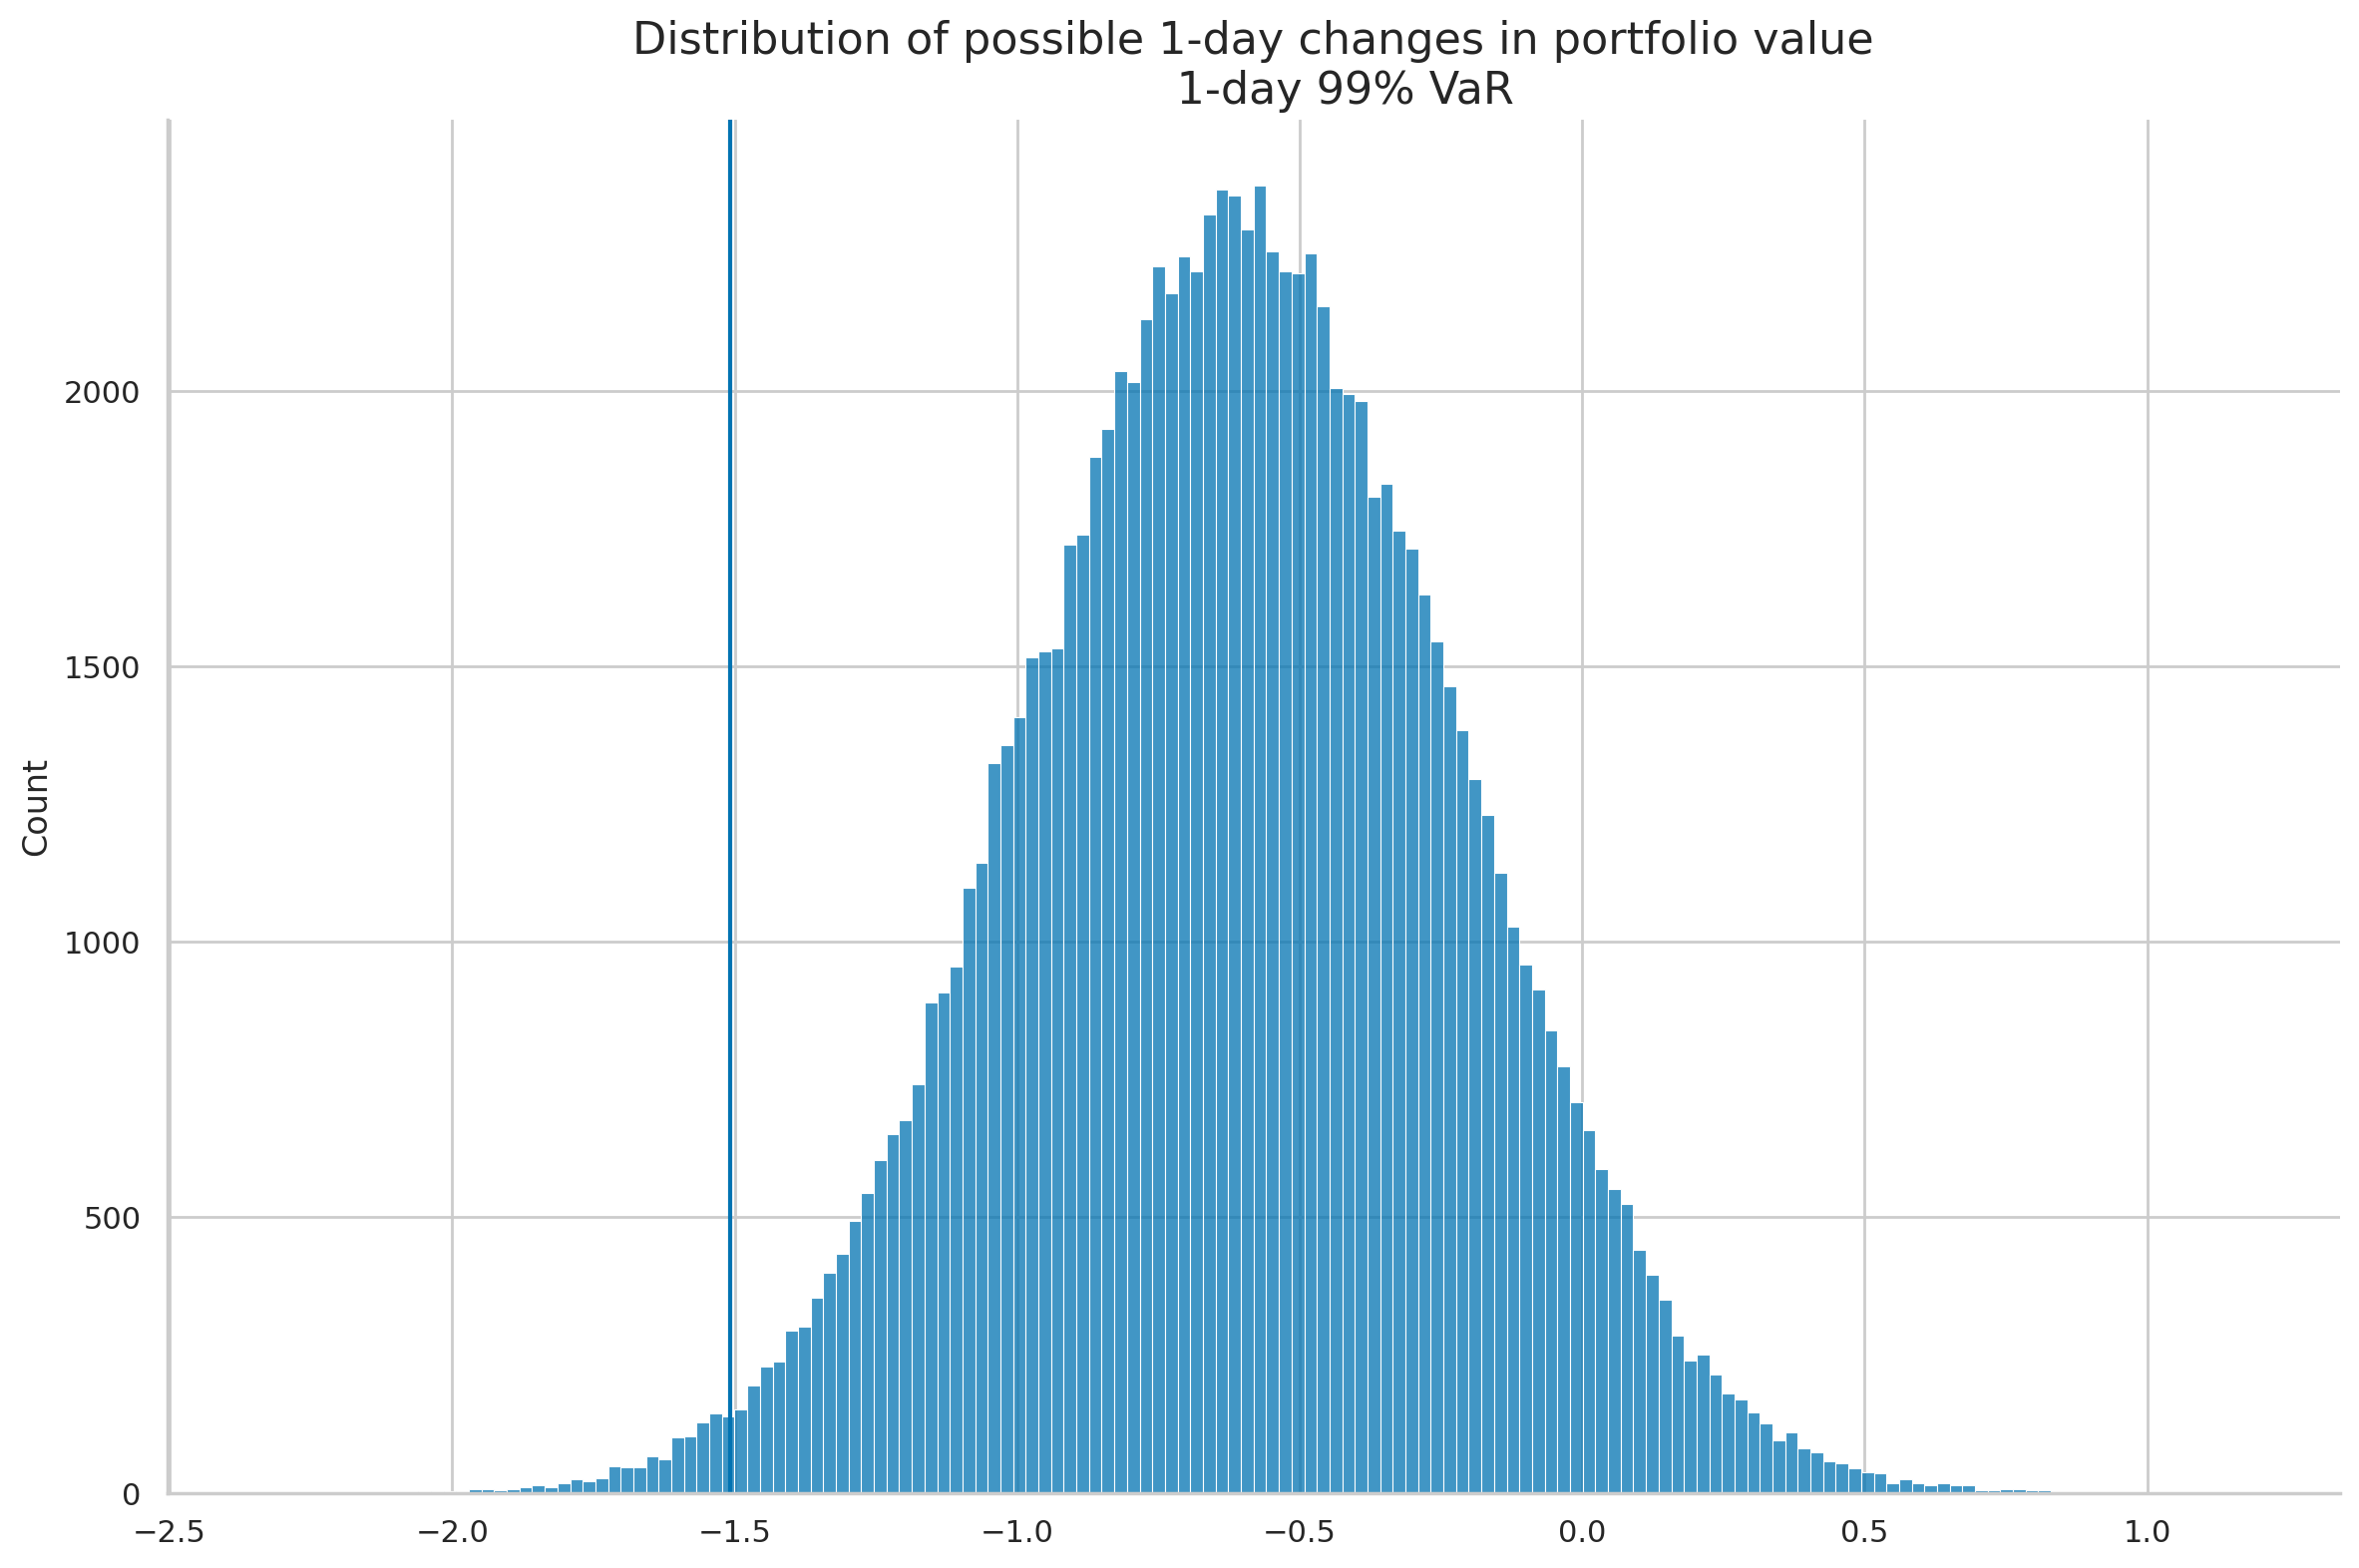

In [230]:
ax = sns.histplot(P_diff, kde=False)
ax.set_title("""Distribution of possible 1-day changes in portfolio value
             1-day 99% VaR""", fontsize=16)
ax.axvline(var[2], 0, 10000)

sns.despine()
plt.tight_layout()

In [231]:
var = np.percentile(P_diff_sorted, 5)
expected_shortfall = P_diff_sorted[P_diff_sorted<=var].mean()

print(f'The 1-day 95% VaR is {-var:.2f}$, and the accompanying Expected Shortfall is {-expected_shortfall:.2f}$.')

The 1-day 95% VaR is 1.24$, and the accompanying Expected Shortfall is 1.40$.
